Here we plot results from the evaluation runs.

We expect 3 csv files available.
- dump of the aps scores
- dump of predictions made
- dump of ground truth labels

We plot 
- average precision per class
- the confusion matrix



In [1]:
# Set the project name (this is the folder name where the output files will be stored)
custom_data_folder = 'amsterdam_custom_samples'

In [2]:
serval_data_folder = "../data"

In [3]:
# class_map
class_map = serval_data_folder + '/' + custom_data_folder + "/csv_files/output_class_mapping.csv"
## class_map = "../dataset/classlabels/csv_files/class_labels_indices_hugo.csv"

# needed in custom utils.py
er_csv = serval_data_folder + '/' + custom_data_folder + "/csv_files/output_serval_evaluation.csv"

In [4]:
import pandas as pd

# load evaluation results step 2
df = pd.read_csv(er_csv, sep=";")

#df
df.sort_values(by=['aps'], ascending=False)

dff = df.query('aps > 0.1')
dff = dff.sort_values(by=['aps'], ascending=False)

# number of classes
num_of_classes = df.shape[0]


In [5]:
dff.shape

(8, 2)

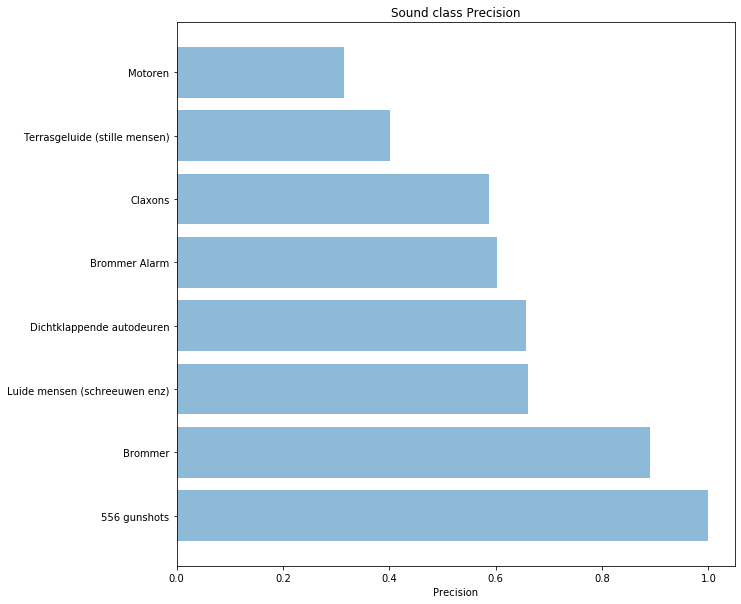

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
 

plt.rcParams["figure.figsize"] = (10,10)
 
plt.barh(y=dff.label, width=dff.aps, align='center', alpha=0.5 )

#plt.yticks(y_pos, objects)
plt.xlabel('Precision')
plt.title('Sound class Precision')

 
plt.show()

In [7]:
import matplotlib as mpl
print(mpl.__version__)

3.1.2


In [8]:
# load the saved data
from numpy import genfromtxt
p = genfromtxt('predictions.csv', delimiter=',')
l = genfromtxt('labels.csv', delimiter=',')
l.sum(axis=1).mean() # only single class examples


1.0

In [9]:
p.shape
#l.shape

# number of cases
num_of_cases = p.shape[0]
num_of_actual_labels = l.sum() # ground truth labels


In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

# confusion matrix
def buildCM(p,l, cutoff=0.3) :
    # check if square
    if p.shape[1] != l.shape[1] :
        return
    # fill empty matrix
    #cm = np.zeros((p.shape[1],l.shape[1]))
    cm = np.zeros((num_of_classes,num_of_classes))
    # now fill
    for r in range(p.shape[0]):
        # for every example
        for i in range(p.shape[1]):
            # for every prediction
            for j in range(l.shape[1]):
                # check every combination
                if l[r][j] == 1.0 and p[r][i] > cutoff :
                    cm[i,j] += 1

    return cm


In [11]:
# Calc false negatives

# cutoffs
cutoffs = [0.1,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

fns =[]

for c in cutoffs:
    #print(p[r][0])
    fns.append(buildCM(p,l, c).sum())


In [12]:
f_negatives = pd.DataFrame(
    {'cut_offs': cutoffs,
     'sum_of_predicted_labels': fns,
     'num_of_actual_labels' : num_of_actual_labels,
     'number_of_cases': num_of_cases
    })
f_negatives

,cut_offs,sum_of_predicted_labels,num_of_actual_labels,number_of_cases
0,0.1,3422.0,3262.0,3262
1,0.3,3297.0,3262.0,3262
2,0.4,3266.0,3262.0,3262
3,0.5,3211.0,3262.0,3262
4,0.6,3157.0,3262.0,3262
5,0.7,3123.0,3262.0,3262
6,0.8,3078.0,3262.0,3262
7,0.9,3005.0,3262.0,3262


In [13]:
# total numer of cases evaluated
cm = buildCM(p,l, cutoff=0.5)
cm.sum()

3211.0

In [14]:
# import some adepted custom serval modules
import sys
sys.path.append('./custom_serval_code')

from utils_confusion_matrix import get_labels

# HK  get ground truth
ground_thruth = get_labels(class_map)
labels = ground_thruth.values()

In [15]:
# final confusion matrix
cutoff = 0.5

cm = buildCM(p,l, cutoff)
cm.shape

(9, 9)

Text(0.5, 1.0, 'Confusion Matrix (cut off = 0.5)')

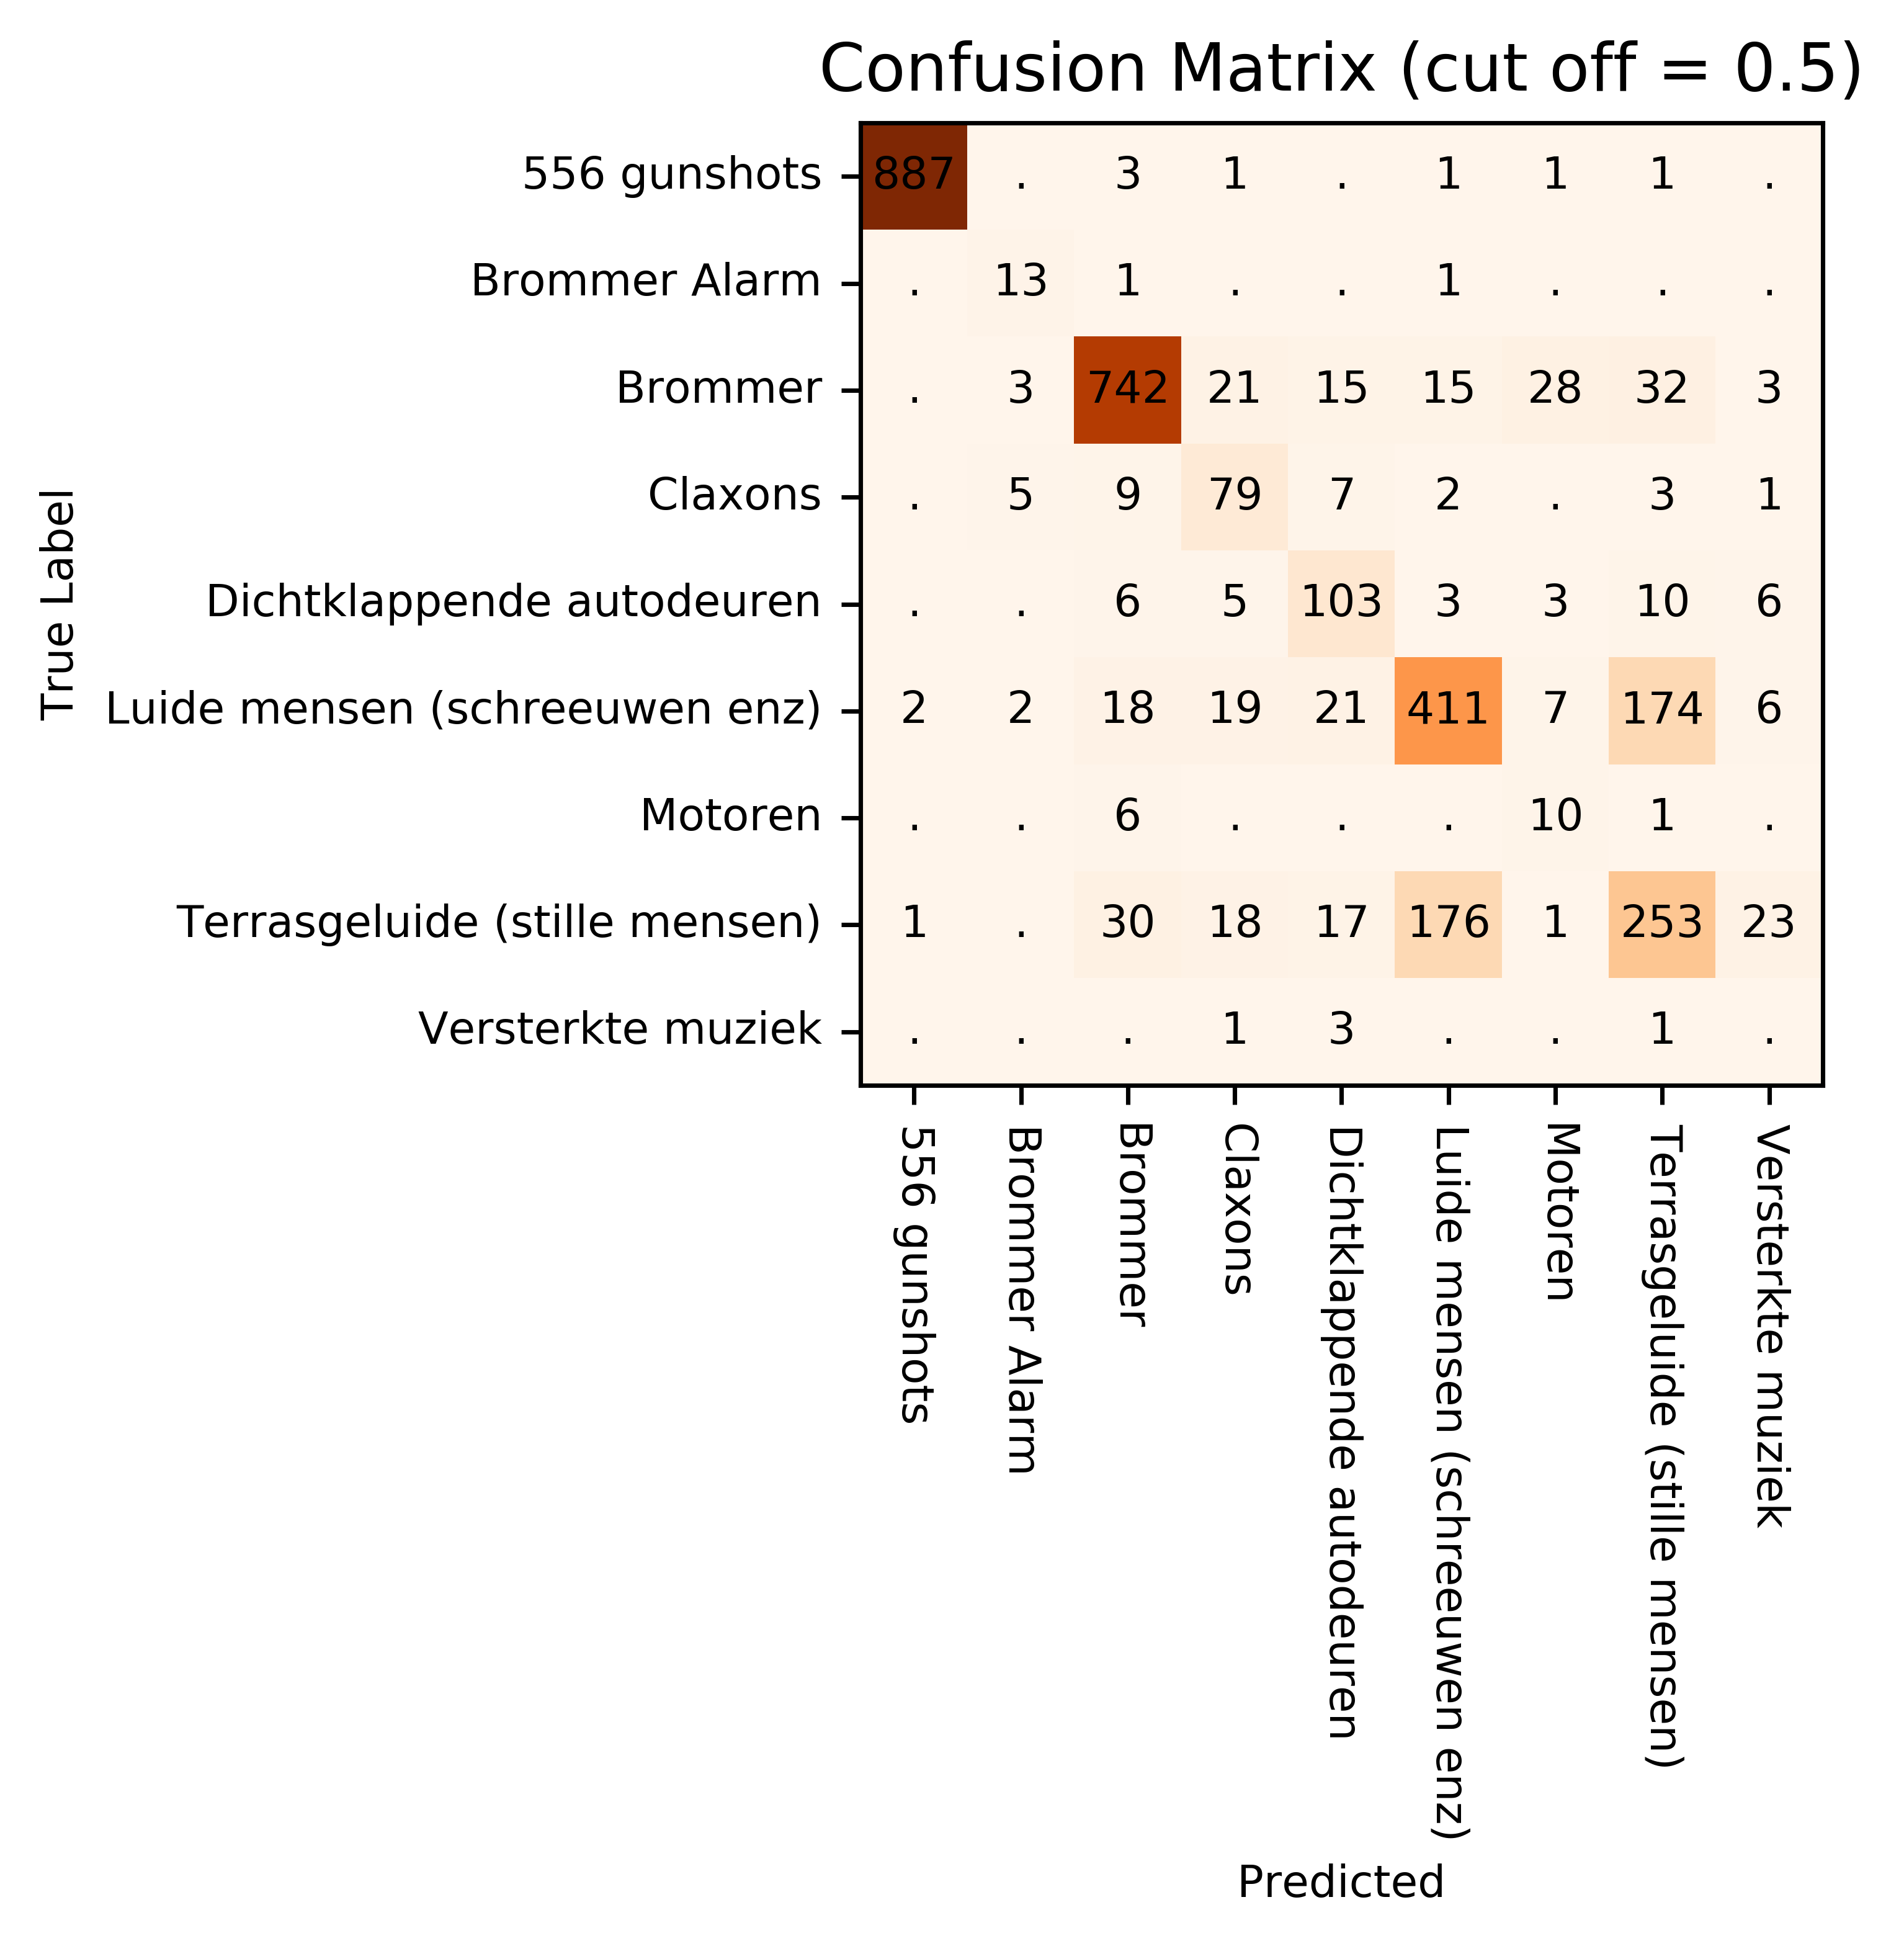

In [16]:
%matplotlib inline

from textwrap import wrap
import re
import itertools
import matplotlib

import matplotlib.pyplot as plt

normalize = True

# font size
fnt_s = 8
fig_s = 5

if normalize:
    #cm = cm.astype('float')*10 / cm.sum(axis=1)[:, np.newaxis]
    cm = np.nan_to_num(cm, copy=True)
    cm = cm.astype('int')

np.set_printoptions(precision=2)
###fig, ax = matplotlib.figure.Figure()

#fig = matplotlib.figure.Figure(figsize=(7, 7), dpi=320, facecolor='w', edgecolor='k')
fig = plt.figure(figsize=(fig_s, fig_s), dpi=640)
ax = fig.add_subplot(1, 1, 1)
im = ax.imshow(cm, cmap='Oranges')

classes = [re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', x) for x in labels]
classes = ['\n'.join(wrap(l, 40)) for l in classes]

tick_marks = np.arange(len(classes))

ax.set_xlabel('Predicted', fontsize=fnt_s)
ax.set_xticks(tick_marks)
c = ax.set_xticklabels(classes, fontsize=fnt_s, rotation=-90,  ha='center')
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.set_ylabel('True Label', fontsize=fnt_s)
ax.set_yticks(tick_marks)
ax.set_yticklabels(classes, fontsize=fnt_s, va ='center')
ax.yaxis.set_label_position('left')
ax.yaxis.tick_left()

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, format(cm[i, j], 'd') if cm[i,j]!=0 else '.', horizontalalignment="center", fontsize=fnt_s, verticalalignment='center', color= "black")
fig.set_tight_layout(True)

# title
plt.title('Confusion Matrix ' + '(cut off = ' + str(cutoff) + ')')

#plt.text(0,0, r'false negative')